In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import os

In [18]:
# Load data
data = pd.read_csv("advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,69.967142,57,58760.283224,165.672157,1
1,63.617357,28,47564.746205,201.718711,1
2,71.476885,20,41004.892416,232.227417,1
3,80.230299,23,59130.240789,245.785590,0
4,62.658466,26,53274.296714,178.380810,0


In [19]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Clicked on Ad               0
dtype: int64


In [20]:
# Check class distribution
print("Target distribution:\n", data['Clicked on Ad'].value_counts())

Target distribution:
 Clicked on Ad
0    513
1    487
Name: count, dtype: int64


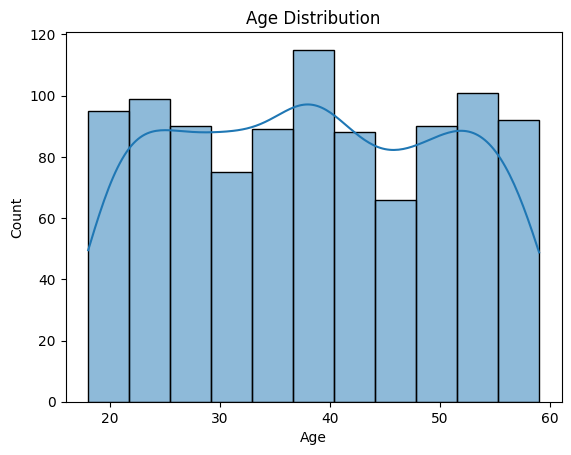

In [21]:
# EDA (Exploratory Data Analysis)
os.makedirs("outputs/plots", exist_ok=True)
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

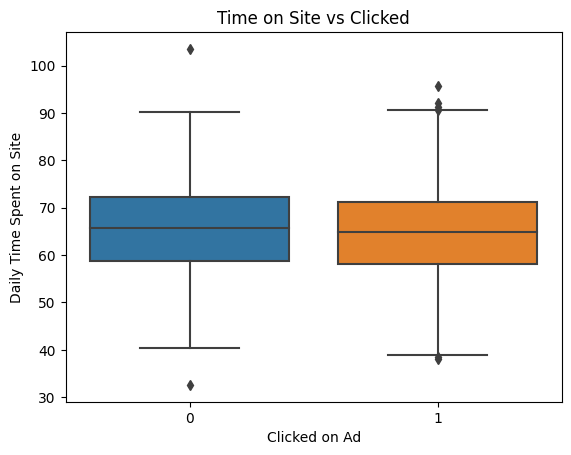

In [22]:
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=data)
plt.title("Time on Site vs Clicked")
plt.show()

In [23]:
# Features and target
X = data[["Age", "Area Income", "Daily Time Spent on Site", "Daily Internet Usage"]]
y = data["Clicked on Ad"]

In [24]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Try Logistic Regression and Random Forest
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier()
}

best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_model = model

LogisticRegression Accuracy: 0.4650
RandomForest Accuracy: 0.5150


In [26]:
# Evaluation
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.64      0.55        94
           1       0.56      0.41      0.47       106

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.53      0.52      0.51       200



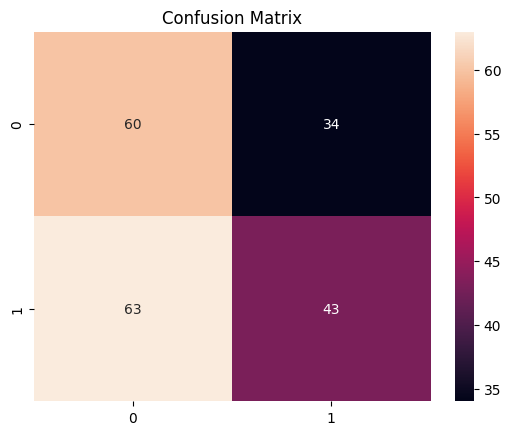

In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

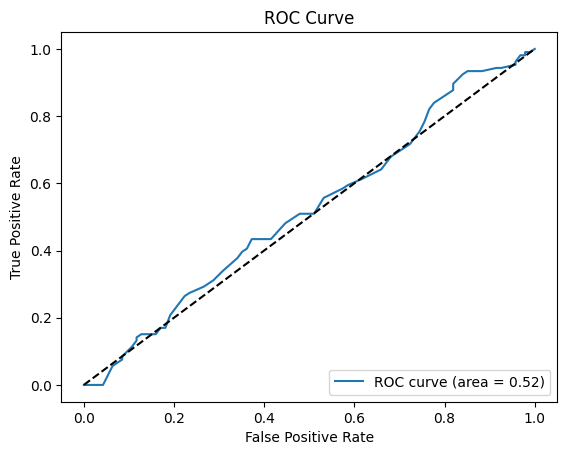

In [28]:
# ROC Curve
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()